## Generating synthetic dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate synthetic dataset
np.random.seed(42)

num_samples = 1000
data = pd.DataFrame({
    'age': np.random.randint(18, 70, size=num_samples),
    'income': np.random.randint(20000, 100000, size=num_samples),
    'loan_amount': np.random.randint(1000, 50000, size=num_samples),
    'loan_duration': np.random.randint(1, 30, size=num_samples),
    'default': np.random.choice([0, 1], size=num_samples, p=[0.8, 0.2])
})

# Display first few rows of the dataset
data.head()


,age,income,loan_amount,loan_duration,default
0,56,54674,48055,25,0
1,69,55854,47733,3,1
2,46,66271,20508,1,0
3,32,93688,43287,4,0
4,60,58518,14380,25,0


## Data Pre-processing

In [3]:
data.isnull().sum()

X = data.drop('default', axis=1)
y = data['default']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Model Development and Evaluation

In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8
Confusion Matrix:
[[240   8]
 [ 52   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       248
           1       0.00      0.00      0.00        52

    accuracy                           0.80       300
   macro avg       0.41      0.48      0.44       300
weighted avg       0.68      0.80      0.73       300



## Feature Importance

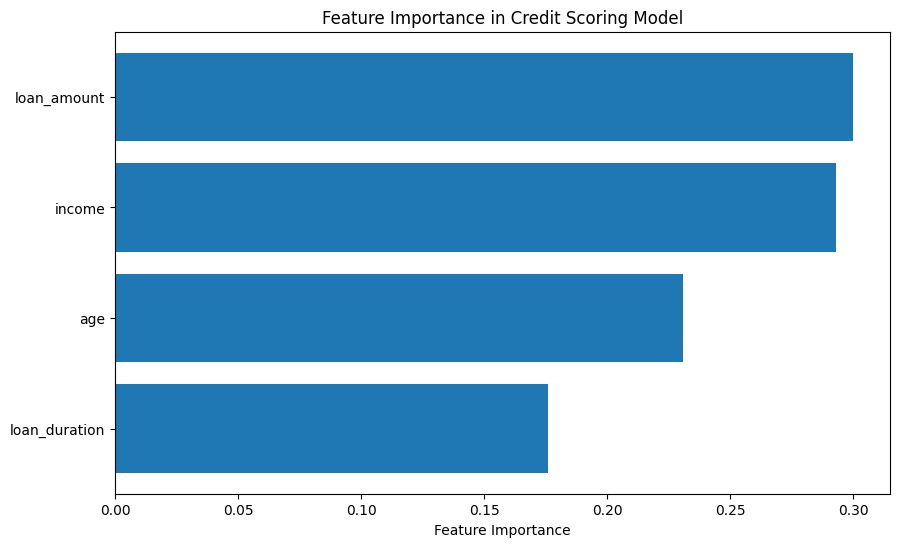

In [7]:
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Credit Scoring Model')
plt.gca().invert_yaxis()
plt.show()
